# Ahsan Fayyaz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline

### CSC 217 - Final Exam

For your final exam, you will be looking at a dataset from FiveThirtyEight that looks at the voting record of each member of the House of Representatives ever since Donald Trump has been elected. There are eight columns: last name, state, party (Republican or Democrat), votes (the total number of votes they cast), votes_for (the total number of votes they made that agreed with Trump's position on the issue), votes_against (the total number of votes they made that disagreed with Trump's position on the issue), vote_percentage (the percentage of their votes that agreed with Trump's position) and GDP (the GDP of the state their district is in). Keep in mind that there are multiple representatives for most states. As an FYI, this data spans records from the last two Congresses (115th and 116th).

The data DOES NOT need to be cleaned beyond what has been provided.

Please write out your answer for each question.

There are 14 total questions and a bonus question. There are 70 possible points - the maximum score possible is 75/70 after the bonus question. Partial credit may be awarded on questions under my discretion.

The exam is due to me (via email - evan.agovino.ccny@gmail.com) by 9 PM on Wednesday, May 22nd. Late submissions will not be accepted.

Good luck and please reach out to me via email or Slack (preferably Slack) with questions.

In [2]:
total_df = pd.read_csv('total_df.csv')
total_df.head()

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
0,Abraham,LA,R,222,208,14,0.936937,53589
1,Adams,NC,D,236,31,204,0.135593,54441
2,Aderholt,AL,R,244,238,6,0.975410,45219
3,Aguilar,CA,D,242,52,190,0.214876,74205
4,Allen,GA,R,244,236,7,0.967213,55832


    1. How many members are in each party? (3 points)

In [3]:
total_df['party'].value_counts()

R    275
D    256
Name: party, dtype: int64

    2. Which state has the most representatives? How many representatives does it have? (4 points)

In [4]:
most_rep = total_df['state'].value_counts()
most_rep_count = total_df['state'].value_counts().max()
print("The State which maximum representatives is: ", most_rep.head())
print("The max number of representatives a state has: ", most_rep_count)

The State which maximum representatives is:  CA    61
TX    45
NY    31
FL    31
PA    26
Name: state, dtype: int64
The max number of representatives a state has:  61


#### California has maximum number of representatives = 61

    3. Plot a histogram of the vote percentage for each state and describe what it looks like. (3 points)

(array([ 80., 115.,  43.,  11.,   4.,   2.,   5.,   6.,  40., 225.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

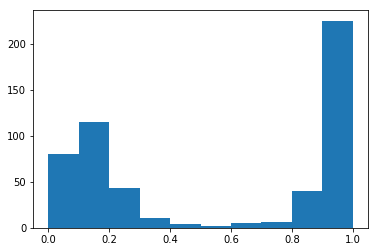

In [5]:
plt.hist(total_df['vote_percentage'])

The histogram is not evenly distributed. It looks like a bimodal distribition where most of the vote percentages are concentrated below 30% and above 80% represented by two peaks.

    4. What is the maximum vote percentage in the dataset? How many representatives have that maximum vote percentage? (4 points)

In [6]:
max_percentage = total_df['vote_percentage'].max()
max_percentage_people = total_df[total_df['vote_percentage'] == max_percentage ]
count_max_percentage = len(max_percentage_people)
max_percentage_people

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
69,Chaffetz,UT,R,62,62,0,1.0,55550
209,Hern,OK,R,60,60,0,1.0,50613
245,Joyce,PA,R,54,54,0,1.0,61594
330,Miller,WV,R,54,54,0,1.0,43053
366,Pence,IN,R,52,52,0,1.0,55172
402,Rose,TN,R,54,54,0,1.0,53933
461,Steube,FL,R,54,54,0,1.0,48318
530,Zinke,MT,R,2,2,0,1.0,46609


In [7]:
print("The maximum percentage of votes is: ", max_percentage*100,"%")
print("Number of representatives who have 100% votes are: ", count_max_percentage)

The maximum percentage of votes is:  100.0 %
Number of representatives who have 100% votes are:  8


    5. Find out how many total Republican and Democrat votes were for and against Trump's policies (hint: do a groupby and sum the 'votes_for' and 'votes_against' columns) (4 points)

In [8]:
total_df.groupby('party')['votes_for','votes_against'].sum()

,votes_for,votes_against
party,,
D,8163,39779
R,50770,3608


    6. Now do a chi-squared test for homogeneity on the Democrats vs. Republicans to see if they could conceivably come from the same distribution (hint: use the methodology from this workbook:  https://github.com/CSC217/spring_2019/blob/master/week09-hypothesis_testing_ii/Hypothesis_Testing_II_Workbook.ipynb). What is the Chi-squared score from the test? Can we reject the null hypothesis at a 0.05 signifiance level that Democrats and Republicans come from the same distribution, voting-wise? (8 points)

Our p-value is 0 which is less than 0.05, we reject the null hypothesis so it is safe to say that democratic and republicans come from the same distribution when we are talking about votes

In [9]:
democrats = [total_df[total_df['party'] == 'D']['votes_for'].sum(), total_df[total_df['party'] == 'D']['votes_against'].sum()]
republicans = [total_df[total_df['party'] == 'R']['votes_for'].sum(), total_df[total_df['party'] == 'R']['votes_against'].sum()]
stats.chi2_contingency([democrats, republicans])

(60791.45718371537, 0.0, 1, array([[27613.03641517, 20328.96358483],
        [31319.96358483, 23058.03641517]]))

    7. Given the number of degrees of freedom in the test, what would be the minimum Chi-square value necessary to reject the null hypothesis at a 0.05 signifiance level that the Democrats and Republicans come from the same distribution, voting-wise? (8 points)

#### Null Hypothesis: The Republicans and Democrats come from the same distribution
#### Alternate Hypothesis: The Republicans and Democrats come from the different distribution

The rejection region that Democrats and Republicans come from the same distribution = 3.841458820694124.

In [10]:
stats.chi2(1).ppf(0.95)

3.841458820694124

    8. What is the correlation between the GDP of the state a representative is representing and the percentage of time that representative agrees with Trump? Is the correlation statistically significant? (5 points)

In [11]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

vote_percent = total_df['vote_percentage']
gdp_count = total_df['gdp']
slope, intercept, predictions, residuals = evaluate_linear_relationship(gdp_count, vote_percent)

In [12]:
stats.pearsonr(total_df['gdp'], total_df['vote_percentage'])

(-0.35709529391775857, 2.0512046772530115e-17)

The correlation implies that there is a moderate negative correlation between the two variables. The correlation is statistically significant since p-value is close to zero

    9. Find the linear relationship between GDP and the representative's likely percentage to vote. Plot the sdcatterplot with the predictive line on top of it. (6 points)

Text(0.5, 0.92, 'GDP Vs Percentage')

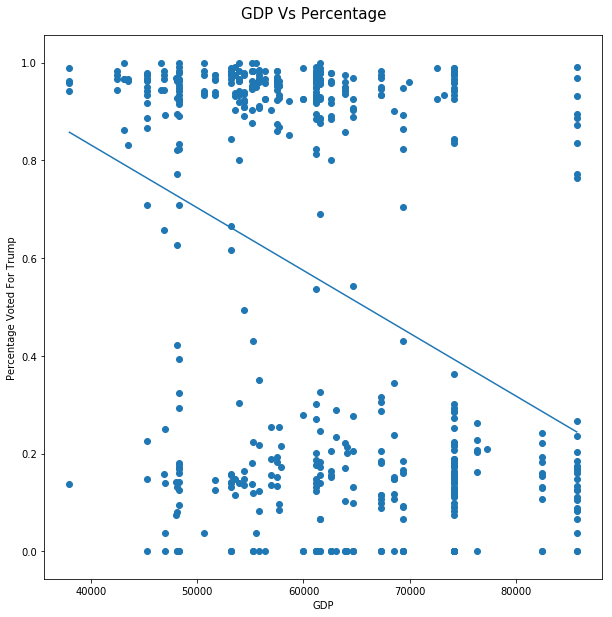

In [13]:
fig=plt.figure(figsize=(10,10))
plt.scatter(total_df['gdp'],total_df['vote_percentage'])
sorted_order=np.argsort(total_df['gdp'])
plt.plot(total_df['gdp'][sorted_order],predictions[sorted_order])
plt.xlabel('GDP')
plt.ylabel('Percentage Voted For Trump')
fig.suptitle('GDP Vs Percentage', fontsize=15, y=0.92)

    10. What is the R^2 value of this relationship? (5 points)

In [14]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(gdp_count, vote_percent)

In [15]:
## R-Squared Value
np.var(predictions) / np.var(vote_percent)

0.12751704893821011

#### R-squared is 12.7%

    11. If a representative comes from a state with a GDP of $50,000, what is the predicted percentage of time that representative will vote with Trump? (5 points)

In [16]:
percent_vote = intercept + (slope * 50000)

In [17]:
print('Percentage of time that representative will vote with Trump = ', percent_vote )

Percentage of time that representative will vote with Trump =  0.7029029463887216


    12. What is the average percentage of time that representatives agreed with Trump given that they came from states with a GDP *greater than* $45,000 and *less than* $55,000? (6 points)

In [18]:
x1 = total_df[total_df['gdp'] > 45000]
new_df = x1[x1['gdp'] < 55000]
new_df['vote_percentage'].mean()

0.6620054458478446

The average percentage of time that representatives agreed with Trump given that they came from states with a GDP greater than 45,000 and less than 55,000 = 66.2%

    13. Plot the residuals plot. Is it homoskedastic or heteroskedastic? (5 points)

Text(0.5, 0.92, 'Residuals')

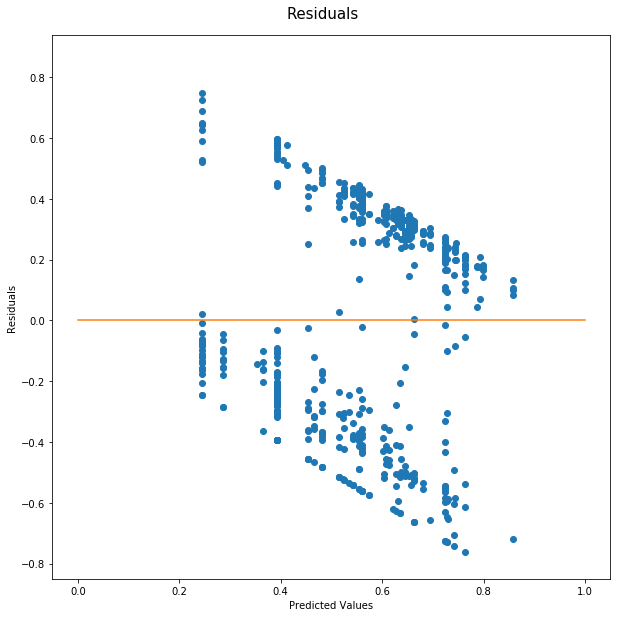

In [19]:
fig=plt.figure(figsize=(10,10))
plt.scatter(predictions, residuals)
plt.plot(predictions.min(), predictions.max(), [0,0])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

    14. Overall do you think there's a linear relationship between these two variables? Why or why not? (4 points)

#### Answer (14)

I do not think there is a linear relationship between the two variables. Our R-squared value was 0.12 meaning that 12% of the time variation in the votes is accounted for by its regression on GDP of the state.

The correlation is also very low, so there is no significant relationship betweent GDP and votes percentage.

    15. *BONUS* Given that the data looks at GDP at the state-level and voting percentage at the representative level, what data would improve this data set? (5 points)

#### Answer (15) Bonus:
I think that since there are different numbers of representatives in each state, it is not a good idea to compare representatives with GDP at state level. For example, every representative sits in a different congressional district, so we can compare the GDP of each congressional district instead of every state. Such a dataset based on GDP of each congressional district would improve our results